In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from init import readFile, split_dataset, error, reduce, CLASSES, FEATURES, plot_confusion_matrix
from k_nearest_neighbours import KNearestNeighbours, Algo

In [52]:
CLASSES = ["classA", "classB", "classC", "classD", "classE"]
data, output = readFile('data/data.csv', CLASSES)

# data = reduce(data)

x_train, y_train, x_test, y_test = split_dataset(data, output)

knn = KNearestNeighbours.fit(x_train, y_train, 3, algo = Algo.KD_TREE, leaf_size = 20)
# print(knn.tree)
%timeit x_test_predict = knn.predict(x_test)
# cf_mat = confusion_matrix(y_test, np.array(list(map(int, x_test_predict))))
# plot_confusion_matrix(cf_mat, CLASSES)

5.48 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
# CLASSES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# FEATURES = ['sepal length (in cm)', 'sepal width (in cm)', 'petal length (in cm)', 'petal width (in cm)']
CLASSES = ["classA", "classB", "classC", "classD", "classE"]
data, output = readFile('data/data.csv', CLASSES)
leaf_size = 20
k_values = np.arange(1, leaf_size, 1, int)
errors = np.zeros(len(k_values))
for i in range(len(k_values)):
    for _ in range(50):
        x_train, y_train, x_test, y_test = split_dataset(data, output)
        knn = KNearestNeighbours.fit(x_train, y_train, k_values[i], algo=Algo.KD_TREE, leaf_size=leaf_size)
        y_pred = knn.predict(x_test)
        errors[i] += error(y_test, y_pred)

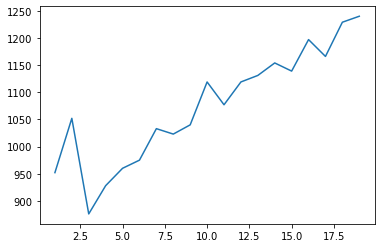

In [19]:
plt.plot(k_values, errors)